In [5]:
! pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [6]:
!gdown "1howD4GwoSVslGHJ8KdXxVR5yL8xEmbog" #data

Downloading...
From: https://drive.google.com/uc?id=1howD4GwoSVslGHJ8KdXxVR5yL8xEmbog
To: /content/data_3.zip
100% 5.92M/5.92M [00:00<00:00, 13.5MB/s]


In [7]:
! unzip "/content/data_3.zip"

Archive:  /content/data_3.zip
  inflating: x_test.npz              
  inflating: y_test.npz              
  inflating: x_train.npz             
 extracting: y_train.npz             


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import math

In [9]:
x_train = np.load("x_train.npz")["arr_0"]
x_test = np.load("x_test.npz")["arr_0"]
y_train = np.load("y_train.npz")["arr_0"]
y_test = np.load("y_test.npz")["arr_0"]

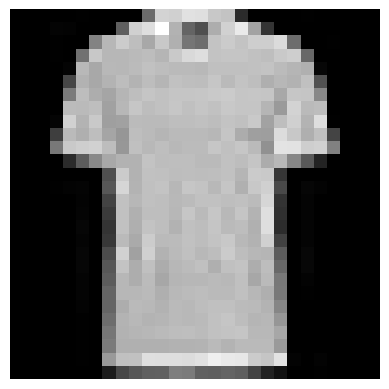

In [10]:
plt.imshow(x_test[2], cmap='gray')  # Assuming you want to plot the first image, change index if needed
plt.axis('off')  # Turn off axis
plt.show()

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(12000, 28*28)
x_train = x_train.T
y_train = y_train.reshape((1, y_train.shape[0]))
x_test = x_test.reshape(2000, 28*28)
x_test = x_test.T
y_test = y_test.reshape((1, y_test.shape[0]))


In [12]:
print("Original x_train shape:", x_train.shape)
print("Normalized x_train shape:", x_train.shape)
print("Original x_test shape:", x_test.shape)
print("Normalized x_test shape:", x_test.shape)

Original x_train shape: (784, 12000)
Normalized x_train shape: (784, 12000)
Original x_test shape: (784, 2000)
Normalized x_test shape: (784, 2000)


# Activation Function

In [13]:
def sigmoid(Z):
    """
    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A

def sigmoid_backward(dA, cache):
    """
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ

In [14]:
def relu(Z):
    """
    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A

def relu_backward(dA, cache):
    """
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

In [15]:
input = 20
rel = sigmoid(input)
print(rel)
print(np.log(rel))
print(np.log(1-rel))

0.9999999979388463
-2.0611536942919273e-09
-19.999999966169824


In [16]:
def identity(Z):
    """
    Compute the identity function of Z element-wise.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of the identity function applied to Z, same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    A = Z
    cache = Z

    return A

def identity_backward(dA, cache):
    """
    Compute the gradient of the cost with respect to Z using the derivative of the identity function.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    # The derivative of the identity function is simply 1
    dZ = dA

    assert (dZ.shape == cache.shape)

    return dZ


In [17]:
def tanh(Z):
    """
    Compute the hyperbolic tangent of Z element-wise.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of the hyperbolic tangent function applied to Z, same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    A = 2 * (1 / (1 + np.exp(-2 * Z))) - 1
    cache = Z

    return A

def tanh_backward(dA, cache):
    """
    Compute the gradient of the cost with respect to Z using the derivative of the custom tanh function.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    A = 2 * (1 / (1 + np.exp(-2 * Z))) - 1
    dZ = dA * (1 - np.power(A, 2))

    assert (dZ.shape == Z.shape)

    return dZ

In [18]:
def leaky_relu(Z, alpha=0.01):
    """
    Compute the Leaky ReLU activation function element-wise.

    Arguments:
    Z -- numpy array of any shape
    alpha -- slope of the negative part (default is 0.01)

    Returns:
    A -- output of the Leaky ReLU function applied to Z, same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    A = np.maximum(alpha * Z, Z)
    cache = Z, alpha

    return A

def leaky_relu_backward(dA, cache):
    """
    Compute the gradient of the cost with respect to Z using the derivative of the Leaky ReLU function.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- tuple containing Z and alpha

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    alpha = 0.01
    Z = cache
    dZ = np.array(dA, copy=True)  # Convert dA to a correct object

    # For negative values of Z, set the gradient to alpha
    dZ[Z <= 0] = alpha * dZ[Z <= 0]

    assert (dZ.shape == Z.shape)

    return dZ

# Initialization

In [19]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])

    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1].
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert parameters['W' + str(l)].shape[0] == layer_dims[l], layer_dims[l-1]
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], 1

    return parameters

In [20]:
def initialize_parameters_zeros(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])

    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1].
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """

    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1])
        assert parameters['b' + str(l)].shape == (layer_dims[l], 1)
        # for key, value in parameters.items():
        #   if key.startswith('W'):
        #       print(f'Shape of {key}: {value.shape}')
        #   elif key.startswith('b'):
        #       print(f'Shape of {key}: {value.shape}')
    return parameters


In [21]:
def initialize_parameters_randomBCoef(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)  # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))
    return parameters

In [22]:
def initialize_parameters_randomSCoef(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)  # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))
    return parameters

In [23]:
def initialize_parameters_he(layers_dims):
    """
    Initialize parameters using He initialization.

    Arguments:
    layers_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1  # number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2. / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        # for key, value in parameters.items():
        #   if key.startswith('W'):
        #       print(f'Shape of {key}: {value.shape}')
        #   elif key.startswith('b'):
        #       print(f'Shape of {key}: {value.shape}')


    return parameters


In [24]:
def initialize_parameters_xavier(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1.0 / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters


# Forward propagation & Backward propagation


In [25]:
def forward_propagation(X, parameters, activation="relu",activationlast = "sigmoid"):
    """
    Implements the forward propagation for the neural network.

    Args:
      X (np.ndarray): The input data, of shape (input_size, num_examples).
      parameters (dict): Dictionary containing the parameters (W and b) of the model.
      activation (str): Activation function to be used ("relu", "sigmoid", "tanh", "leaky_relu", "identity").

    Returns:
      AL (np.ndarray): The output of the last activation, also known as the predicted label.
      cache (tuple): A tuple containing caches for each layer: (z1, a1, W1, b1, z2, a2, W2, b2, ..., zL, aL_prev, WL, bL).
    """
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers
    m = X.shape[1]

    # Implement [LINEAR -> ACTIVATION]*(L-1)
    for l in range(1, L):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A_prev) + b
        if activation == "relu":
            A = relu(Z)
        elif activation == "sigmoid":
            A = sigmoid(Z)
        elif activation == "leaky_relu":
            A = leaky_relu(Z)
        elif activation == "tanh":
            A = tanh(Z)
        elif activation == "identity":
            A = identity(Z)

        linear_cache = (Z, A, W, b)

        caches.append(linear_cache)

    # Implement LINEAR -> ACTIVATION for the last layer (output layer)
    AL_prev = A
    WL = parameters["W" + str(L)]
    bL = parameters["b" + str(L)]
    ZL = np.dot(WL, AL_prev) + bL
    if activationlast == "sigmoid":
        AL = sigmoid(ZL)
    elif activationlast == "relu":
        AL = relu(ZL)
    elif activationlast == "leaky_relu":
        AL = leaky_relu(ZL)
    elif activationlast == "tanh":
        AL = tanh(ZL)
    elif activationlast == "identity":
        AL = identity(ZL)

    linear_cache_L = (ZL, AL, WL, bL)
    caches.append(linear_cache_L)
    # print(ZL[0][0])
    # linear_cache_L = caches[len(caches)-1]
    # print(linear_cache_L[0])
    # print(len(caches))
    # cache_type = type(caches)
    # print("Type of caches:", cache_type)

    # logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
    # cost = 1./m * np.sum(logprobs)
    return AL, caches


def backward_propagation(X, Y, caches, AL, activation="relu" ,activationlast = "sigmoid"):
    """
    Implements the backward propagation for a neural network with any number of layers.

    Args:
      X (np.ndarray): The input data, of shape (input_size, num_examples).
      Y (np.ndarray): The "true" labels vector, of shape (output_size, num_examples).
      cache (tuple): A tuple containing caches from the forward propagation.
      activation (str): Activation function used in the network ("relu", "sigmoid", "tanh", "leaky_relu", "identity").

    Returns:
      gradients (dict): A dictionary containing the gradients of the cost function with respect to the parameters (W and b for each layer).
    """
    gradients = {}
    L = len(caches)
    # print(len(caches))
    m = X.shape[1]  # number of examples
    # AL = cache[-4]  # retrieve the output of the last layer
    Y = Y.reshape(AL.shape)  # make sure Y has the same shape as AL

    # epsilon = 1e-8  # Small value to avoid division by zero
    # dAL = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))
    # Initialize backpropagation

    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients.
    linear_cache_L = caches[len(caches)-1]
    # print(linear_cache_L[0])
    # print(linear_cache_L[1].T.shape)


    if activationlast == "relu":
        dZL = relu_backward(dAL, linear_cache_L[0])
    elif activationlast == "sigmoid":
        dZL = sigmoid_backward(dAL, linear_cache_L[0])
    elif activationlast == "tanh":
        dZL = tanh_backward(dAL, linear_cache_L[0])
    elif activationlast == "leaky_relu":
        dZL = leaky_relu_backward(dAL, linear_cache_L[0])
    elif activationlast == "identity":
        dZL = identity_backward(dAL, linear_cache_L[0])

    gradients["dz" + str(L)] = dZL
    gradients["dW" + str(L)] = np.dot(dZL, caches[-2][1].T) / m
    gradients["db" + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m
    gradients["da" + str(L - 1)] = np.dot(linear_cache_L[2].T, dZL)
    # Assuming L is the last layer index
    # dW_shape = gradients["dW" + str(L)].shape
    # print("Shape of dW" + str(L) + ":", dW_shape)
    # db_shape = gradients["db" + str(L)].shape
    # print("Shape of db" + str(L) + ":", db_shape)


    for l in reversed(range(L-1)):
        # print(l)
        # lth layer: (RELU -> LINEAR) gradients.
        linear_cache = caches[l]
        if activation == "relu":
            dZ = relu_backward(gradients["da" + str(l + 1)], linear_cache[0])
        elif activation == "sigmoid":
            dZ = sigmoid_backward(gradients["da" + str(l + 1)], linear_cache[0])
        elif activation == "tanh":
            dZ = tanh_backward(gradients["da" + str(l + 1)], linear_cache[0])
        elif activation == "leaky_relu":
            dZ = leaky_relu_backward(gradients["da" + str(l + 1)], linear_cache[0])
        elif activation == "identity":
            dZ = identity_backward(gradients["da" + str(l + 1)], linear_cache[0])

        gradients["dz" + str(l + 1)] = dZ
        if l == 0:
            gradients["dW" + str(l + 1)] = np.dot(dZ, X.T) / m
        else:
            gradients["dW" + str(l + 1)] = np.dot(dZ, caches[l-1][1].T) / m
        gradients["db" + str(l + 1)] = np.sum(dZ, axis=1, keepdims=True) / m
        # dW_shape = gradients["dW" + str(l+1)].shape
        # print("Shape of dW" + str(l+1) + ":", dW_shape)
        # print(dZ.shape, linear_cache[1].T.shape)
        # db_shape = gradients["db" + str(l+1)].shape
        # print("Shape of db" + str(l+1) + ":", db_shape)
        if l != 0:
            gradients["da" + str(l)] = np.dot(linear_cache[2].T, dZ)

    return gradients


# backward propagation with regularization

In [26]:
def backward_propagation_with_regularization(X, Y, caches, AL, lambd, activation="relu", activationlast="sigmoid"):
    """
    Implements the backward propagation for a neural network with L2 regularization.

    Args:
      X (np.ndarray): The input data, of shape (input_size, num_examples).
      Y (np.ndarray): The "true" labels vector, of shape (output_size, num_examples).
      caches (tuple): A tuple containing caches from the forward propagation.
      AL (np.ndarray): The output of the last layer, of shape (output_size, num_examples).
      lambd (float): Regularization parameter.
      activation (str): Activation function used in the network ("relu", "sigmoid", "tanh", "leaky_relu", "identity").
      activationlast (str): Activation function used in the last layer ("sigmoid", "tanh", "relu", "leaky_relu", "identity").

    Returns:
      gradients (dict): A dictionary containing the gradients of the cost function with respect to the parameters (W and b for each layer).
    """
    gradients = {}
    L = len(caches)
    m = X.shape[1]  # number of examples
    Y = Y.reshape(AL.shape)
    # for l in reversed(range(L)):
    #   print("Z",caches[l][0].shape)
    #   print("A",caches[l][1].shape)
    #   print("W",caches[l][2].shape)
    #   print("B",caches[l][3].shape)
    # Compute dAL
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Backpropagation for the last layer
    if activationlast == "relu":
        dZL = relu_backward(dAL, caches[-1][0])
    elif activationlast == "sigmoid":
        dZL = sigmoid_backward(dAL, caches[-1][0])
    elif activationlast == "tanh":
        dZL = tanh_backward(dAL, caches[-1][0])
    elif activationlast == "leaky_relu":
        dZL = leaky_relu_backward(dAL, caches[-1][0])
    elif activationlast == "identity":
        dZL = identity_backward(dAL, caches[-1][0])

    # print(dZL.shape)
    # print(caches[-2][1].T.shape)
    # print(caches[-1][2].shape)

    gradients["dz" + str(L)] = dZL
    gradients["dW" + str(L)] = 1/m * (np.dot(dZL, caches[-2][1].T)) + (lambd / m) * caches[-1][2]
    gradients["db" + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m
    gradients["da" + str(L - 1)] = np.dot(caches[-1][2].T, dZL)

    # Backpropagation for the other layers
    for l in reversed(range(L - 1)):
        if activation == "relu":
            dZ = relu_backward(gradients["da" + str(l + 1)], caches[l][0])
        elif activation == "sigmoid":
            dZ = sigmoid_backward(gradients["da" + str(l + 1)], caches[l][0])
        elif activation == "tanh":
            dZ = tanh_backward(gradients["da" + str(l + 1)], caches[l][0])
        elif activation == "leaky_relu":
            dZ = leaky_relu_backward(gradients["da" + str(l + 1)], caches[l][0])
        elif activation == "identity":
            dZ = identity_backward(gradients["da" + str(l + 1)], caches[l][0])

        gradients["dz" + str(l + 1)] = dZ
        if l == 0:
          gradients["dW" + str(l + 1)] = 1/m * (np.dot(dZ, X.T)) + (lambd / m) * caches[l][2]
        else:
          gradients["dW" + str(l + 1)] = 1/m * (np.dot(dZ, caches[l-1][1].T)) + (lambd / m) * caches[l][2]
        # gradients["dW" + str(l + 1)] = 1/m * (np.dot(dZ, caches[l][1].T)) + (lambd / m) * caches[l][2]
        gradients["db" + str(l + 1)] = np.sum(dZ, axis=1, keepdims=True) / m
        if l != 0:
            gradients["da" + str(l)] = np.dot(caches[l][2].T, dZ)

    return gradients


# Mini Batch

In [27]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y =  Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, int(m/mini_batch_size)*mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

# Optimizer

In [28]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

In [29]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl

    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}

    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        ### END CODE HERE ###

    return v

In [30]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum

    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar

    Returns:
    parameters -- python dictionary containing your updated parameters
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Momentum update for each parameter
    for l in range(L):
        # compute velocities
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1 - beta)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1 - beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]

    return parameters, v

In [31]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl

    Returns:
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """

    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}

    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))


    return v, s

In [32]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam

    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates
    beta2 -- Exponential decay hyperparameter for the second moment estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """

    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}

    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1 - beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1 - beta1)*grads['db' + str(l+1)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1 - beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - beta1**t)

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".

        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1 - beta2)*np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1 - beta2)*np.square(grads['db' + str(l+1)])

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1 - beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - beta2**t)

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)

    return parameters, v, s

In [33]:
def initialize_rmsprop(parameters):
    """
    Initializes s as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl

    Returns:
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """

    L = len(parameters) // 2  # number of layers in the neural networks
    s = {}

    # Initialize s. Input: "parameters". Output: "s".
    for l in range(L):
        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l+1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l+1)])

    return s


In [34]:
def update_parameters_with_rmsprop(parameters, grads, s, learning_rate=0.01, rho=0.9, epsilon=1e-8):
    """
    Update parameters using RMSprop

    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameter:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    s -- RMSprop variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    rho -- decay rate for the moving average.
    epsilon -- small scalar to avoid dividing by zero.

    Returns:
    parameters -- python dictionary containing your updated parameters
    s -- RMSprop variable, moving average of the squared gradient, python dictionary
    """

    L = len(parameters) // 2  # number of layers in the neural network

    # Perform RMSprop update on all parameters
    for l in range(L):
        # Moving average of the squared gradients. Inputs: "s, grads, rho". Output: "s".
        s["dW" + str(l+1)] = rho * s["dW" + str(l+1)] + (1 - rho) * np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = rho * s["db" + str(l+1)] + (1 - rho) * np.square(grads['db' + str(l+1)])

        # Update parameters. Inputs: "parameters, learning_rate, s, epsilon". Output: "parameters".
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)] / (np.sqrt(s["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)] / (np.sqrt(s["db" + str(l+1)]) + epsilon)

    return parameters, s


In [35]:
def update_parameters_with_sgd(parameters, grads, learning_rate=0.01):
    """
    Update parameters using SGD (Stochastic Gradient Descent).

    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameter:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    L = len(parameters) // 2

    # Update parameters for each layer
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

    return parameters


# Cost & Accuracy

In [36]:
def compute_cost(AL, Y):

    """
    Implement the cost function

    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3

    Returns:
    cost - value of the cost function without dividing by number of training examples

    Note:
    This is used with mini-batches,
    so we'll first accumulate costs over an entire epoch
    and then divide by the m training examples
    """
    m = Y.shape[1]

    logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
    cost_total =  np.sum(logprobs)

    return cost_total

In [37]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization.

    Arguments:
    AL -- post-activation, output of forward propagation, shape (1, number of examples)
    Y -- "true" labels vector, same shape as AL
    parameters -- python dictionary containing parameters of the model
    lambd -- regularization hyperparameter, scalar

    Returns:
    cost - value of the cost function with L2 regularization
    """
    m = Y.shape[1]

    # Compute cross-entropy cost
    cross_entropy_cost = compute_cost(AL, Y)

    # Compute L2 regularization term
    L2_regularization_cost = 0
    L = len(parameters) // 2  # Number of layers in the neural network

    for l in range(1, L + 1):
        W = parameters["W" + str(l)]
        L2_regularization_cost += np.sum(np.square(W))

    L2_regularization_cost *= (lambd / (2 * m))

    # Add cross-entropy cost and L2 regularization cost
    cost = cross_entropy_cost + L2_regularization_cost

    return cost


In [38]:
def predict(X, y, parameters, activation):
    """
    This function is used to predict the results of a  n-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]

    # Forward propagation
    a3, caches = forward_propagation(X, parameters, activation)

    # convert probas to 0/1 predictions
    p = (a3 > 0.5)


    return np.sum((p == y))/m

# model

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have your necessary functions defined here:
# initialize_parameters, L_model_forward, compute_cost, L_model_backward, update_parameters,
# random_mini_batches

def model(X, Y, x_test, y_test, layers_dims, optimizer, initialization, learning_rate=0.001, mini_batch_size=64, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True, lambd=0, activation="relu"):
    """
    3-layer neural network model which can be run in different optimizer modes.

    Arguments:
    X -- input data, of shape (n_features, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost and accuracy every 1000 epochs
    lambd -- regularization hyperparameter
    activation -- activation function ("relu", "sigmoid", etc.)

    Returns:
    parameters -- python dictionary containing your updated parameters
    predictions -- predictions on test data
    """
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    accuracies = []                  # to keep track of the accuracy
    predictions = []                 # to keep track of the predictions
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples

    # Initialize parameters
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "BCoef":
        parameters = initialize_parameters_randomBCoef(layers_dims)
    elif initialization == "SCoef":
        parameters = initialize_parameters_randomSCoef(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "sgd":
        mini_batch_size = 1
    elif optimizer == "sgd_momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    elif optimizer == "rmsprop":
        s = initialize_rmsprop(parameters)

    # Optimization loop
    for i in range(num_epochs + 1):

        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        accuracy_total = 0

        for minibatch in minibatches:
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch


            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters, activation)

            # Compute cost
            if lambd == 0:
                cost_total += compute_cost(a3, minibatch_Y)
            else:
                cost_total += compute_cost_with_regularization(a3, minibatch_Y, parameters, lambd)

            # Backward propagation
            if lambd == 0:
                grads = backward_propagation(minibatch_X, minibatch_Y, caches, a3, activation)
            else:
                grads = backward_propagation_with_regularization(minibatch_X, minibatch_Y, caches, a3, lambd, activation)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_sgd(parameters, grads, learning_rate)
            if optimizer == "sgd":
                parameters = update_parameters_with_sgd(parameters, grads, learning_rate)
            elif optimizer == "sgd_momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1  # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2, epsilon)
            elif optimizer == "rmsprop":
                parameters, s = update_parameters_with_rmsprop(parameters, grads, s, learning_rate, beta1, epsilon)

        # Average cost and accuracy over all minibatches
        cost_avg = cost_total / m
        accuracy_avg = predict(X, Y, parameters, activation)



        # Print the cost and accuracy every 1000 epochs
        if print_cost and i % 100 == 0:
             print(f"Cost after epoch {i}: {cost_avg}, Accuracy: {accuracy_avg}")


        # Append the cost and accuracy to the lists
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
            accuracies.append(accuracy_avg)

    # Plot the cost, accuracy, and predictions
    pred = predict(x_test, y_test, parameters, activation)
    print(f"Accuracy of test data: {pred}")
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title("Cost over epochs")

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy over epochs")

    plt.tight_layout()
    plt.show()

    return parameters


# Test Activation Function

Cost after epoch 0: 0.4362743356709391, Accuracy: 0.8894166666666666
Cost after epoch 100: 0.06605318290600085, Accuracy: 0.9785833333333334
Cost after epoch 200: 0.05219660900256027, Accuracy: 0.9834166666666667
Cost after epoch 300: 0.04661905304521602, Accuracy: 0.98525
Cost after epoch 400: 0.043379294927319116, Accuracy: 0.9863333333333333
Cost after epoch 500: 0.0411288557124639, Accuracy: 0.9866666666666667
Cost after epoch 600: 0.03937996204543461, Accuracy: 0.9871666666666666
(784, 2000)
Accuracy of test data: 0.9855


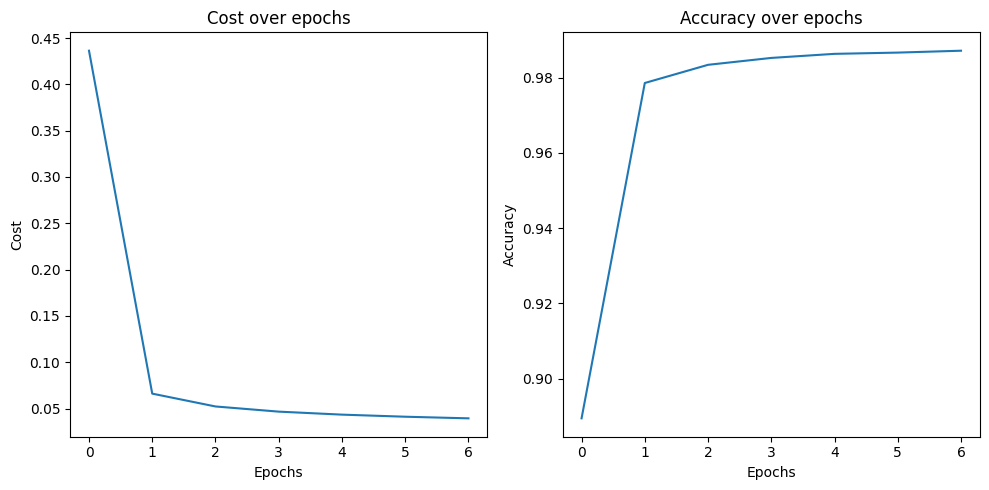

In [44]:
# identity
layers_dims = [x_train.shape[0], 30, 20, 10, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="identity")

Cost after epoch 0: 0.5138741782776397, Accuracy: 0.88325
Cost after epoch 100: 0.11282848474591535, Accuracy: 0.9708333333333333
Cost after epoch 200: 0.0772861733017374, Accuracy: 0.981
Cost after epoch 300: 0.062493558598613046, Accuracy: 0.98425
Cost after epoch 400: 0.054664423877059186, Accuracy: 0.9856666666666667
Cost after epoch 500: 0.0497018640847863, Accuracy: 0.9865833333333334
Cost after epoch 600: 0.04620667729337277, Accuracy: 0.9879166666666667
(784, 2000)
Accuracy of test data: 0.985


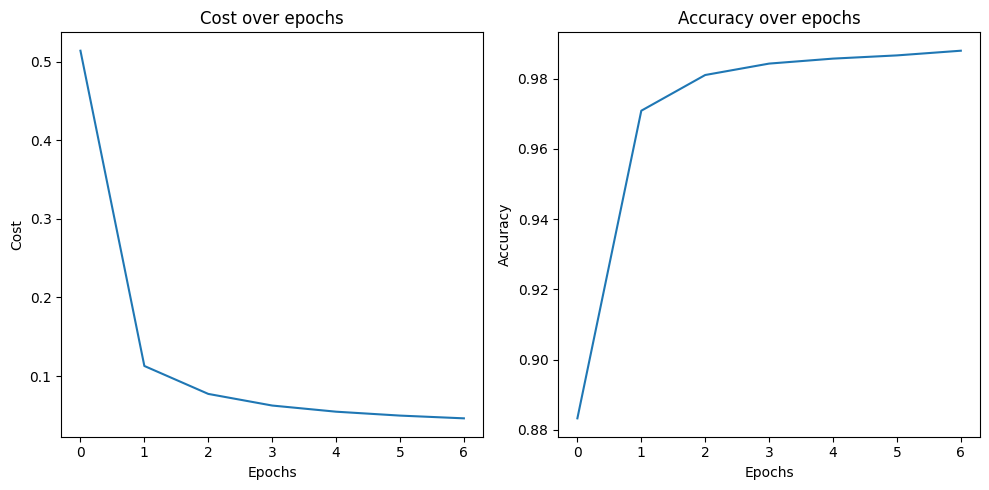

In [46]:
# tanh
layers_dims = [x_train.shape[0], 30, 20, 10, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="tanh")

Cost after epoch 0: 0.5957162896094503, Accuracy: 0.89125
Cost after epoch 100: 0.08850268072605406, Accuracy: 0.9730833333333333
Cost after epoch 200: 0.061002882763283195, Accuracy: 0.9813333333333333
Cost after epoch 300: 0.05085460489095235, Accuracy: 0.9841666666666666
Cost after epoch 400: 0.04555656246830272, Accuracy: 0.9858333333333333
Cost after epoch 500: 0.042179643975815535, Accuracy: 0.9866666666666667
Cost after epoch 600: 0.039716878777991106, Accuracy: 0.9875833333333334
Accuracy of test data: 0.986


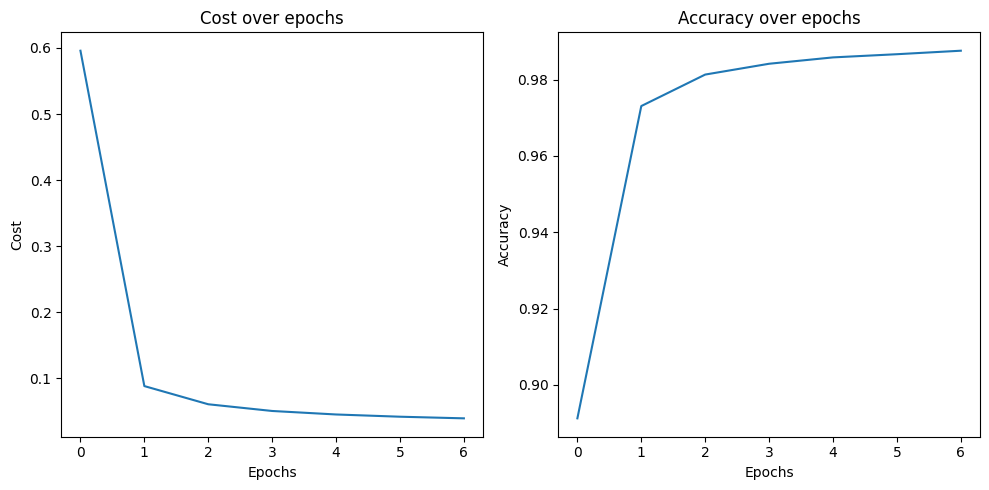

In [50]:
# relu
layers_dims = [x_train.shape[0], 30, 20, 10, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.5950110280991487, Accuracy: 0.8928333333333334
Cost after epoch 100: 0.08849718093888434, Accuracy: 0.9733333333333334
Cost after epoch 200: 0.06098605773973935, Accuracy: 0.9815
Cost after epoch 300: 0.050861260902399875, Accuracy: 0.9841666666666666
Cost after epoch 400: 0.04556611578714671, Accuracy: 0.9858333333333333
Cost after epoch 500: 0.04220396068800236, Accuracy: 0.9866666666666667
Cost after epoch 600: 0.039751946746433696, Accuracy: 0.9874166666666667
Accuracy of test data: 0.986


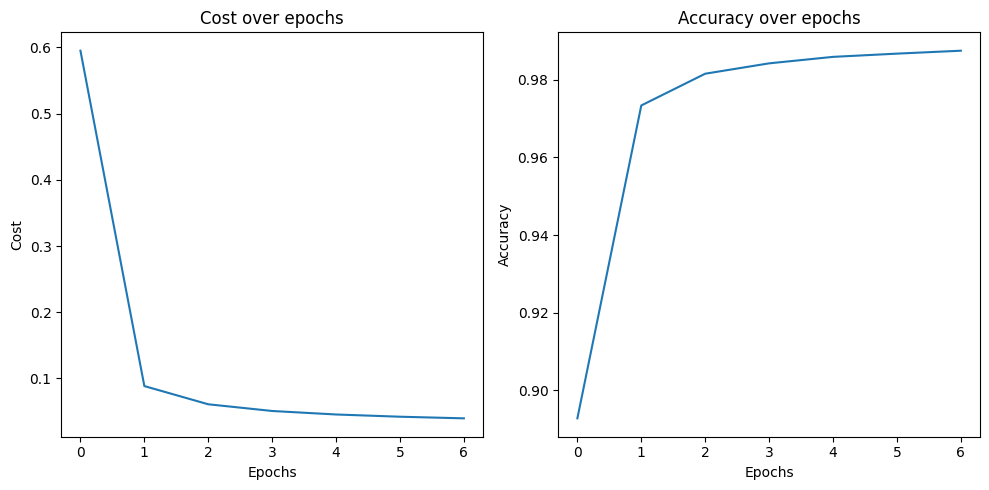

In [49]:
# leaky_relu
layers_dims = [x_train.shape[0], 30, 20, 10, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="leaky_relu")

Cost after epoch 0: 0.6993215262327483, Accuracy: 0.5
Cost after epoch 100: 0.682722539101411, Accuracy: 0.7159166666666666
Cost after epoch 200: 0.6753143928139516, Accuracy: 0.9231666666666667
Cost after epoch 300: 0.6663759501938576, Accuracy: 0.9399166666666666
Cost after epoch 400: 0.6549379921264283, Accuracy: 0.9473333333333334
Cost after epoch 500: 0.6399785584586375, Accuracy: 0.95125
Cost after epoch 600: 0.6203536752039404, Accuracy: 0.9528333333333333
Accuracy of test data: 0.9435


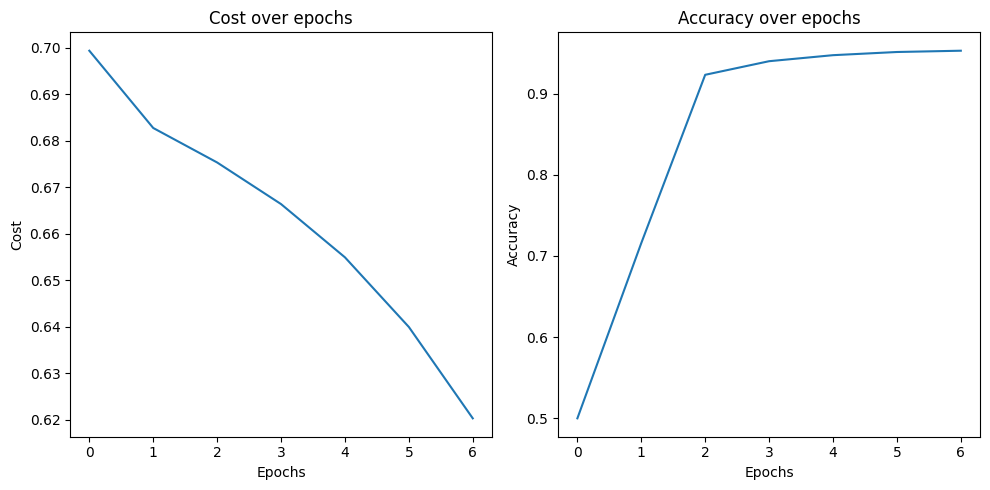

In [51]:
# sigmoid
layers_dims = [x_train.shape[0], 30, 20, 10, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="sigmoid")

Testing model with relu activation function:
Cost after epoch 0: 0.6771336752270216, Accuracy: 0.5990833333333333
Cost after epoch 100: 0.09112516537929616, Accuracy: 0.97225
Cost after epoch 200: 0.05622702441619837, Accuracy: 0.9816666666666667
Cost after epoch 300: 0.04741123369191776, Accuracy: 0.9846666666666667
Cost after epoch 400: 0.04284417430191855, Accuracy: 0.9868333333333333
Cost after epoch 500: 0.03974977850560708, Accuracy: 0.9883333333333333
Cost after epoch 600: 0.03733635161922837, Accuracy: 0.9893333333333333
Accuracy of test data: 0.9835


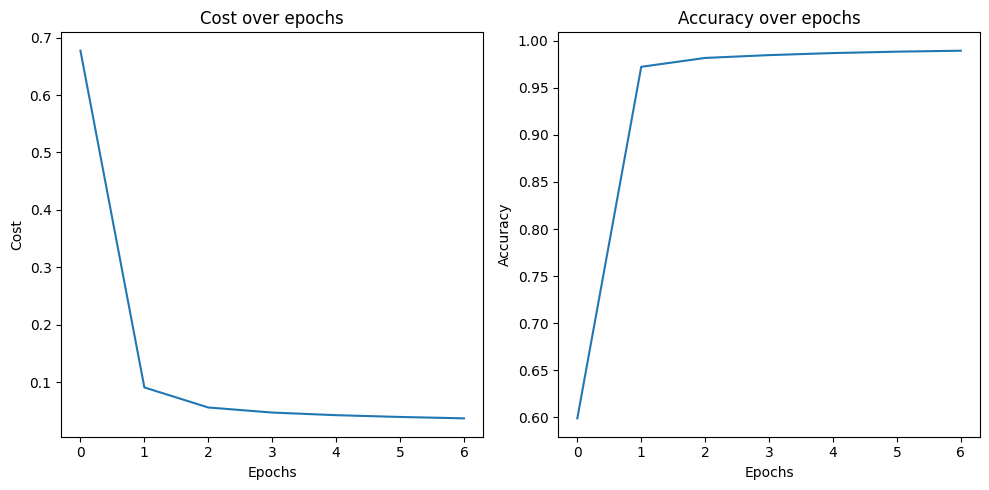

Testing model with leaky_relu activation function:
Cost after epoch 0: 0.6793549389434955, Accuracy: 0.6050833333333333
Cost after epoch 100: 0.08851330124374308, Accuracy: 0.9734166666666667
Cost after epoch 200: 0.05586774047324867, Accuracy: 0.9813333333333333
Cost after epoch 300: 0.04725984254420176, Accuracy: 0.9845833333333334
Cost after epoch 400: 0.042728071418580545, Accuracy: 0.987
Cost after epoch 500: 0.0396627888577708, Accuracy: 0.9881666666666666
Cost after epoch 600: 0.03732524034490866, Accuracy: 0.9893333333333333
Accuracy of test data: 0.9835


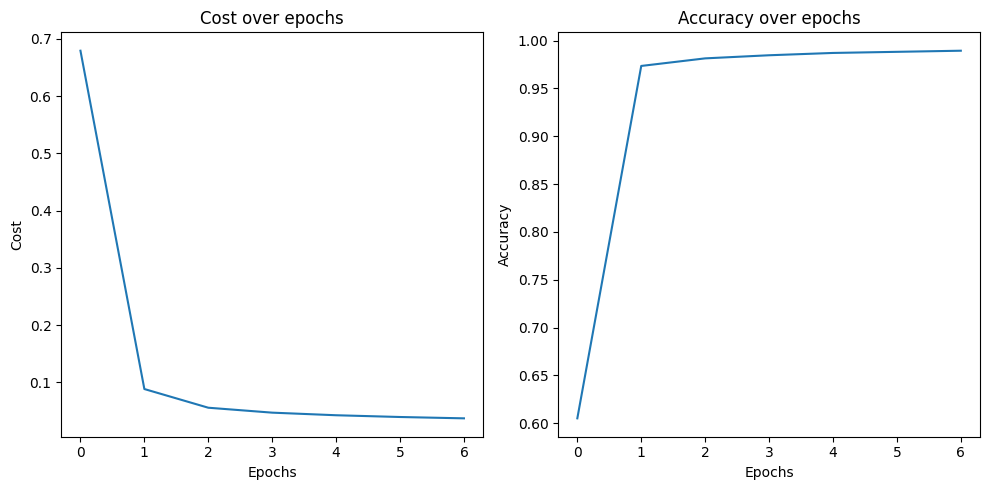

Testing model with tanh activation function:
Cost after epoch 0: 0.8051280738841924, Accuracy: 0.5033333333333333
Cost after epoch 100: 0.13993278711179527, Accuracy: 0.9724166666666667
Cost after epoch 200: 0.08579503503698556, Accuracy: 0.9809166666666667
Cost after epoch 300: 0.06601072052458364, Accuracy: 0.9846666666666667
Cost after epoch 400: 0.055660507030419616, Accuracy: 0.9863333333333333
Cost after epoch 500: 0.049187114709007496, Accuracy: 0.98775
Cost after epoch 600: 0.044690284345022716, Accuracy: 0.9885833333333334
Accuracy of test data: 0.982


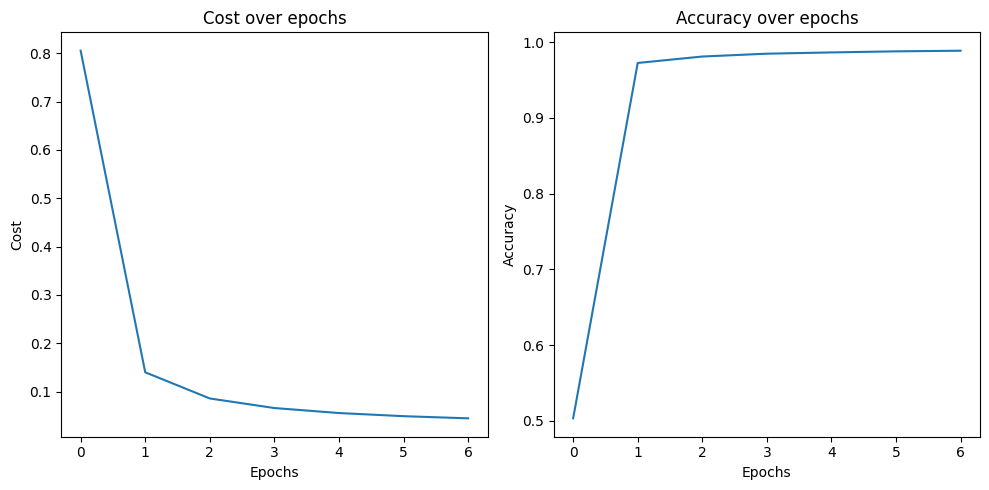

Testing model with sigmoid activation function:
Cost after epoch 0: 0.707691631357623, Accuracy: 0.5
Cost after epoch 100: 0.6940667132297487, Accuracy: 0.5
Cost after epoch 200: 0.6935420105029341, Accuracy: 0.4974166666666667
Cost after epoch 300: 0.6932968632988169, Accuracy: 0.38058333333333333
Cost after epoch 400: 0.6930583526709622, Accuracy: 0.5255
Cost after epoch 500: 0.6928191588593101, Accuracy: 0.6503333333333333
Cost after epoch 600: 0.6925778706050918, Accuracy: 0.7344166666666667
Accuracy of test data: 0.7245


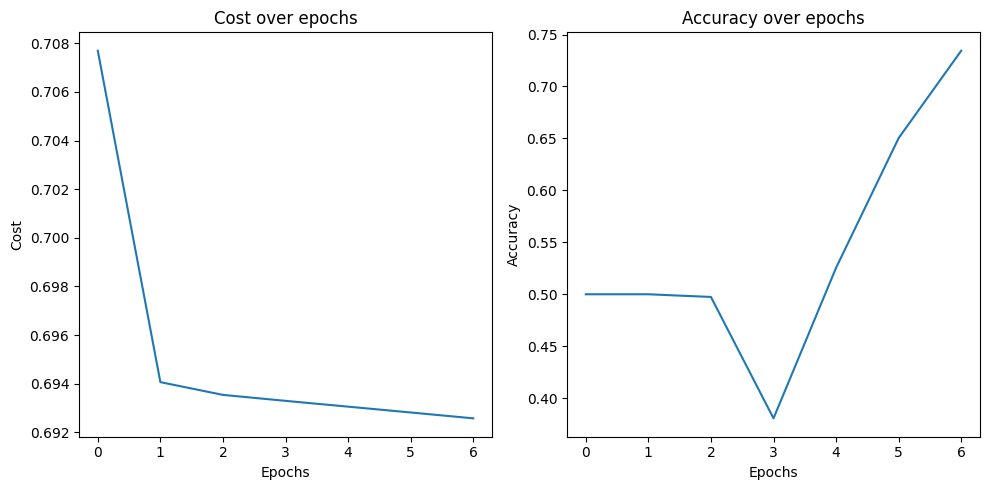

Testing model with identity activation function:
Cost after epoch 0: 0.9814978891861347, Accuracy: 0.6203333333333333
Cost after epoch 100: 0.06309581146003716, Accuracy: 0.9783333333333334
Cost after epoch 200: 0.05064226309438078, Accuracy: 0.9825
Cost after epoch 300: 0.04513160887316055, Accuracy: 0.9851666666666666
Cost after epoch 400: 0.041627510835103354, Accuracy: 0.9865
Cost after epoch 500: 0.03905530020209589, Accuracy: 0.98725
Cost after epoch 600: 0.03700769932664572, Accuracy: 0.9885833333333334
Accuracy of test data: 0.9835


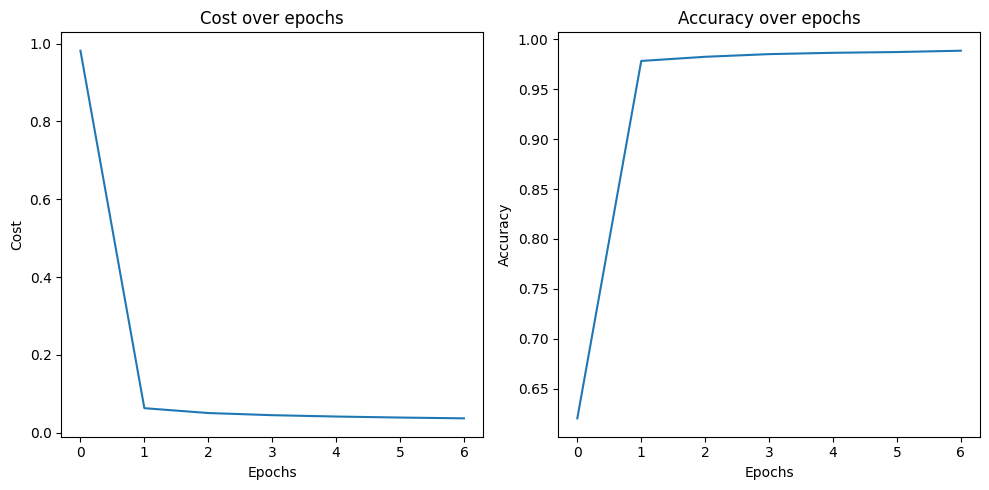

In [55]:
# Define the architecture of your neural network (number of units in each layer)
layers_dims = [x_train.shape[0], 50, 30, 20, 10, 1]  # Example architecture

# Define hyperparameters and optimizer settings
optimizer = "gd"
initialization = "he"
learning_rate = 0.0001
mini_batch_size = 64
num_epochs = 600
print_cost = True
lambd = 0  # Regularization parameter
beta = 0.9
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8

# List of activation functions to test
activation_functions = ["relu", "leaky_relu", "tanh", "sigmoid", "identity"]

# Test the model with different activation functions
for activation in activation_functions:
    print(f"Testing model with {activation} activation function:")
    parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer, initialization, learning_rate,
                       mini_batch_size, beta, beta1, beta2, epsilon, num_epochs, print_cost, lambd, activation)


# Test initialization

Cost after epoch 0: 0.7432580034591705, Accuracy: 0.5009166666666667
Cost after epoch 100: 0.11680008717378934, Accuracy: 0.9689166666666666
Cost after epoch 200: 0.07814951328001929, Accuracy: 0.977
Cost after epoch 300: 0.06363830277559245, Accuracy: 0.9800833333333333
Cost after epoch 400: 0.05625323914643476, Accuracy: 0.98325
Cost after epoch 500: 0.05170282032023223, Accuracy: 0.98425
Cost after epoch 600: 0.048534515350291324, Accuracy: 0.985
Accuracy of test data: 0.9825


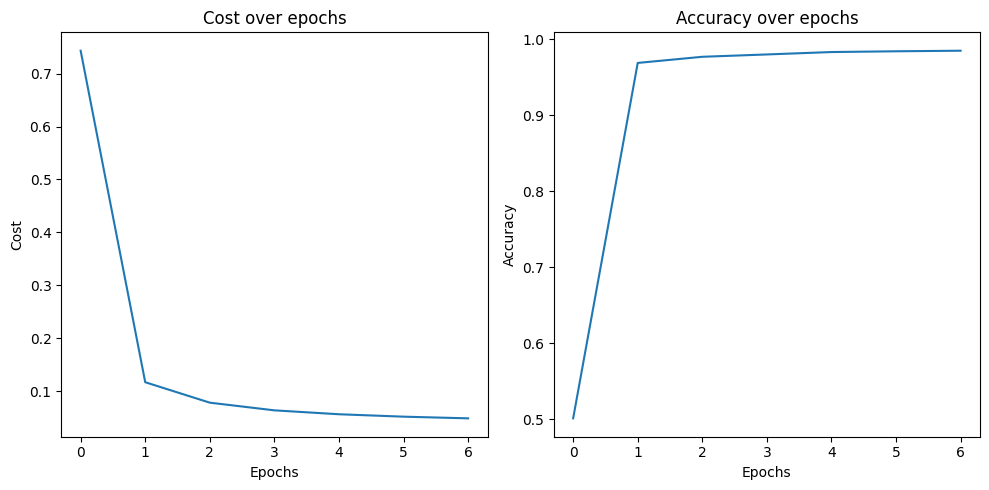

In [56]:
# He
layers_dims = [x_train.shape[0], 30, 20, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="he",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.6763669276483061, Accuracy: 0.7620833333333333
Cost after epoch 100: 0.13077826187283698, Accuracy: 0.96525
Cost after epoch 200: 0.08503039835063225, Accuracy: 0.9735833333333334
Cost after epoch 300: 0.06748869881573308, Accuracy: 0.9784166666666667
Cost after epoch 400: 0.058690873731750116, Accuracy: 0.9810833333333333
Cost after epoch 500: 0.05338574290784526, Accuracy: 0.98275
Cost after epoch 600: 0.0497684648103791, Accuracy: 0.9835
Accuracy of test data: 0.979


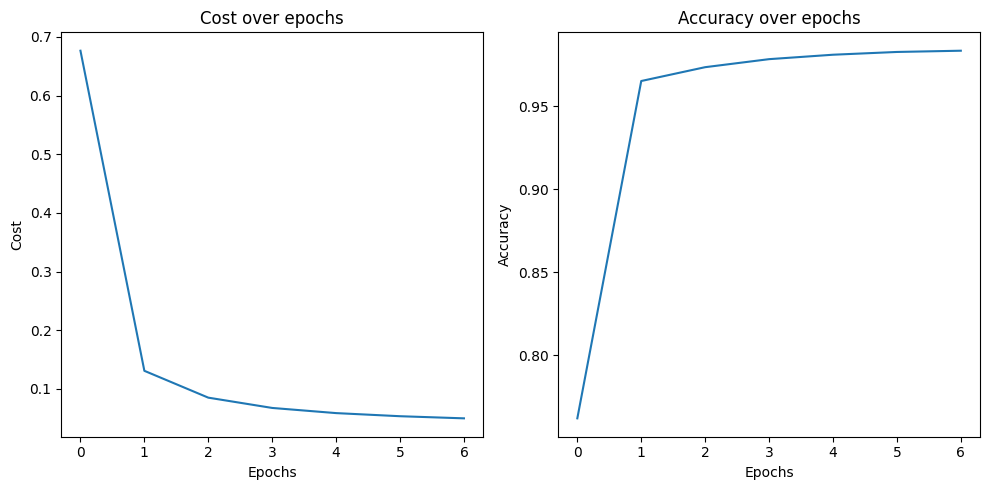

In [57]:
# xavier
layers_dims = [x_train.shape[0], 50, 20, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="xavier",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.9,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.6647591282712425, Accuracy: 0.9376666666666666
Cost after epoch 100: 0.01738204981950737, Accuracy: 0.9943333333333333
Cost after epoch 200: 0.009876957492417923, Accuracy: 0.9980833333333333
Cost after epoch 300: 0.0041055788832736265, Accuracy: 0.9990833333333333
Cost after epoch 400: 0.0008807415977837579, Accuracy: 0.9996666666666667


<ipython-input-36-85603aaea6db>:20: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-36-85603aaea6db>:20: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-25-510a5862e930>:94: RuntimeWarning: invalid value encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


Cost after epoch 500: nan, Accuracy: 0.5
Cost after epoch 600: nan, Accuracy: 0.5
Accuracy of test data: 0.5


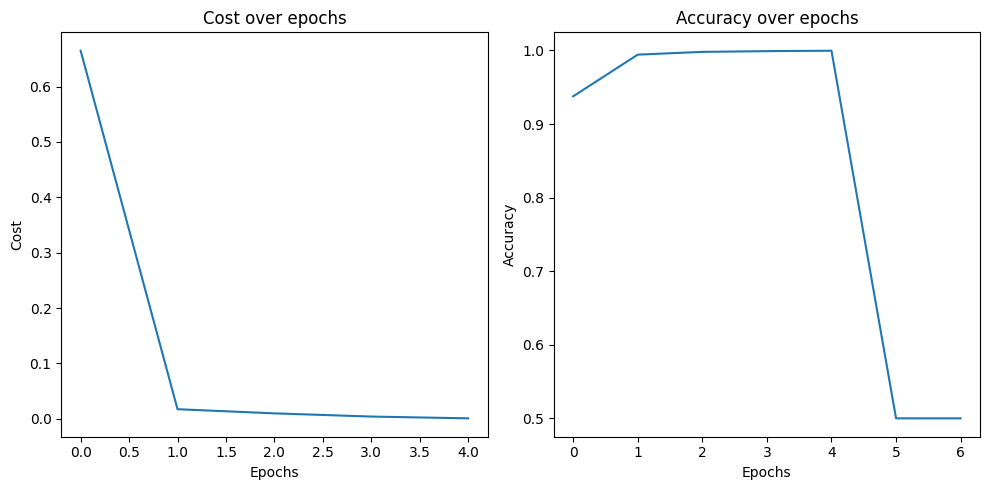

In [58]:
# SCoef
layers_dims = [x_train.shape[0], 50, 20, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="adam", initialization="SCoef",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.9,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

In [59]:
# BCoef
layers_dims = [x_train.shape[0], 50, 20, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="adam", initialization="BCoef",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

<ipython-input-13-bd424192613d>:11: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
<ipython-input-36-85603aaea6db>:20: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-36-85603aaea6db>:20: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-25-510a5862e930>:94: RuntimeWarning: divide by zero encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
<ipython-input-25-510a5862e930>:94: RuntimeWarning: invalid value encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
<ipython-input-13-bd424192613d>:27: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))
<ipython-input-13-bd424192613d>:28: RuntimeWarning: invalid value encountered in multiply
  dZ = dA * s * (1-s)


Cost after epoch 0: nan, Accuracy: 0.5
Cost after epoch 100: nan, Accuracy: 0.5


KeyboardInterrupt: 

Cost after epoch 0: 0.6931473963094874, Accuracy: 0.5
Cost after epoch 100: 0.6931473988484395, Accuracy: 0.5
Cost after epoch 200: 0.6931473743312858, Accuracy: 0.5
Cost after epoch 300: 0.693147379308175, Accuracy: 0.5
Cost after epoch 400: 0.6931473685132966, Accuracy: 0.5
Cost after epoch 500: 0.6931473204403796, Accuracy: 0.5
Cost after epoch 600: 0.6931473741617458, Accuracy: 0.5
Accuracy of test data: 0.5


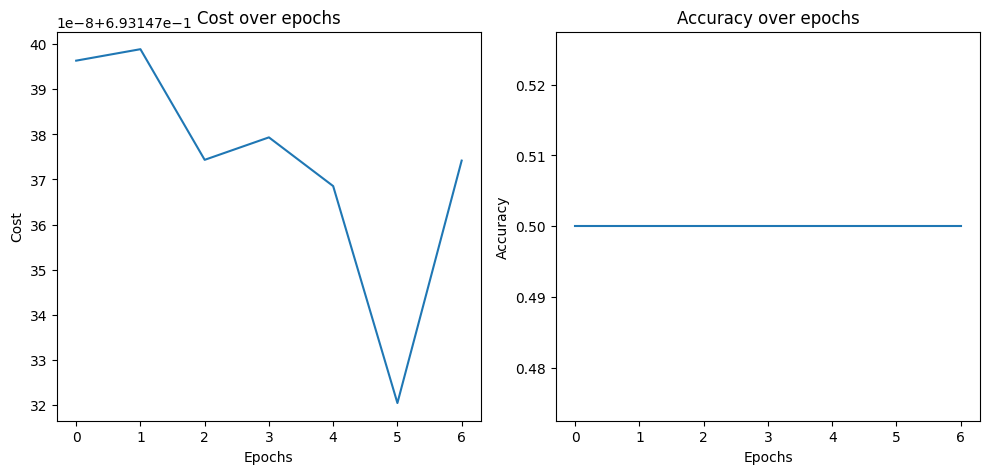

In [60]:
# zeros
layers_dims = [x_train.shape[0], 50, 20, 1]
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="gd", initialization="zeros",
                   learning_rate=0.0001, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
                   num_epochs=600, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.6931497744199973, Accuracy: 0.4920833333333333
Cost after epoch 1000: 0.6652416451341003, Accuracy: 0.5988333333333333
Cost after epoch 2000: 0.6425291730343548, Accuracy: 0.6280833333333333
Cost after epoch 3000: 0.620262025002103, Accuracy: 0.6549166666666667
Cost after epoch 4000: 0.5808876359375031, Accuracy: 0.69325
Accuracy of test data: 0.4875


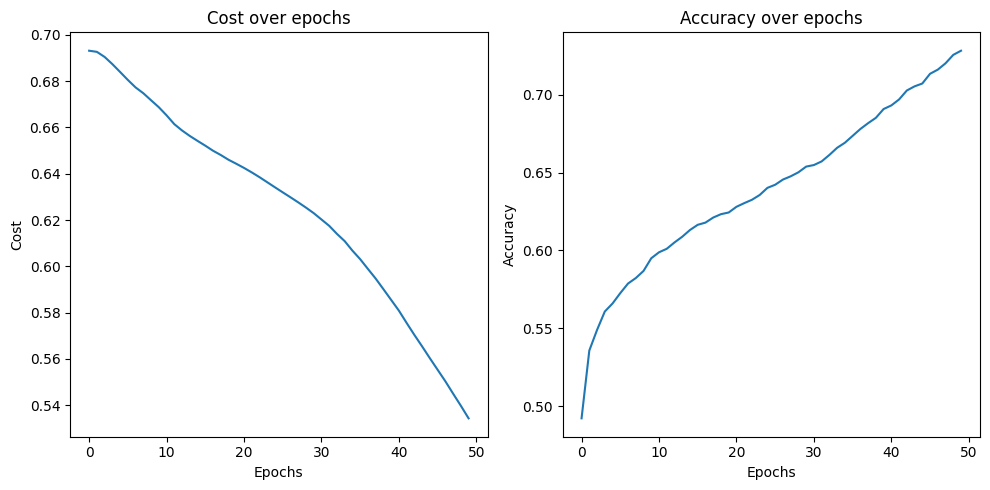

In [ ]:
layers_dims = [x_train.shape[0], 50, 20, 1] # he 0.01
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="adam", initialization="he", learning_rate=0.00008, mini_batch_size=100, beta=0.5, beta1=0.5, beta2=0.5, num_epochs=5000, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.6931504152478593, Accuracy: 0.492
Cost after epoch 1000: 0.6645998496369004, Accuracy: 0.59475
Cost after epoch 2000: 0.6404309133623677, Accuracy: 0.6299166666666667
Cost after epoch 3000: 0.6103936250631459, Accuracy: 0.6609166666666667
Cost after epoch 4000: 0.566123670216023, Accuracy: 0.70475
Accuracy of test data: 0.4945


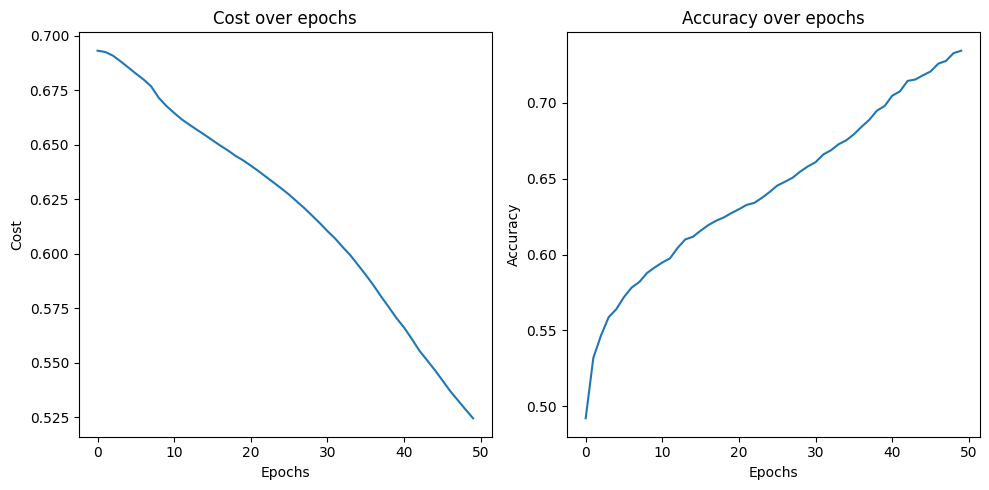

In [ ]:
layers_dims = [x_train.shape[0], 50, 20, 1] #he 0.01
parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer="adam", initialization="he", learning_rate=0.0001, mini_batch_size=100, beta=0.5, beta1=0.6, beta2=0.6, num_epochs=5000, print_cost=True, lambd=0, activation="relu")

Cost after epoch 0: 0.693150272098334, Accuracy: 0.4955
Cost after epoch 1000: 0.6619233637570336, Accuracy: 0.602
Cost after epoch 2000: 0.6284756558022753, Accuracy: 0.6424166666666666
Cost after epoch 3000: 0.5535894522576078, Accuracy: 0.7105833333333333
Cost after epoch 4000: 0.4162894893947917, Accuracy: 0.8100833333333334


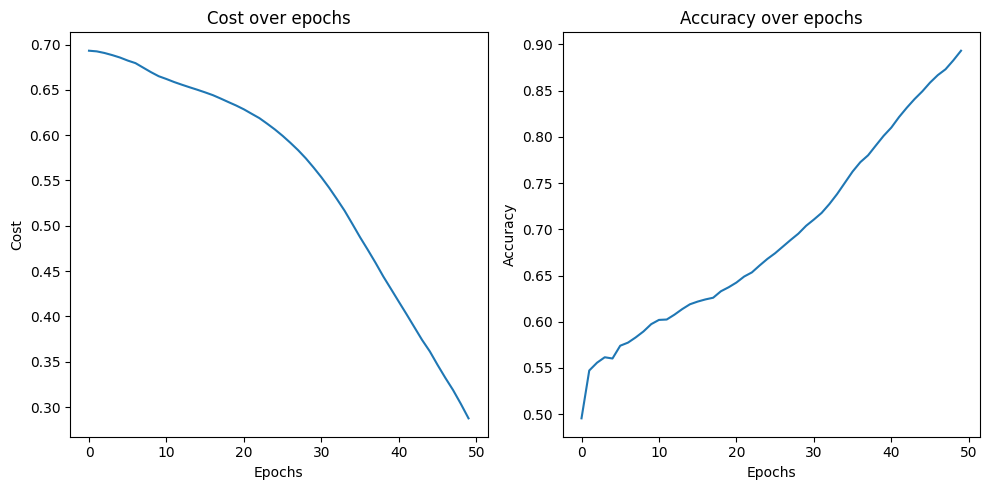

In [ ]:
layers_dims = [x_train.shape[0], 50, 20, 1]
parameters = model(x_train, y_train, layers_dims, optimizer="adam", initialization="SCoef", learning_rate=0.0001, mini_batch_size=100, num_epochs=5000, print_cost=True, lambd=0, activation="relu")

# Test optimizer

Testing model with adam optimizer:
Cost after epoch 0: 0.33361144949453875, Accuracy: 0.9636666666666667


<ipython-input-36-85603aaea6db>:20: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-36-85603aaea6db>:20: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
<ipython-input-25-510a5862e930>:94: RuntimeWarning: invalid value encountered in divide
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


Cost after epoch 100: nan, Accuracy: 0.5
Cost after epoch 200: nan, Accuracy: 0.5
Cost after epoch 300: nan, Accuracy: 0.5
Cost after epoch 400: nan, Accuracy: 0.5
Accuracy of test data: 0.5


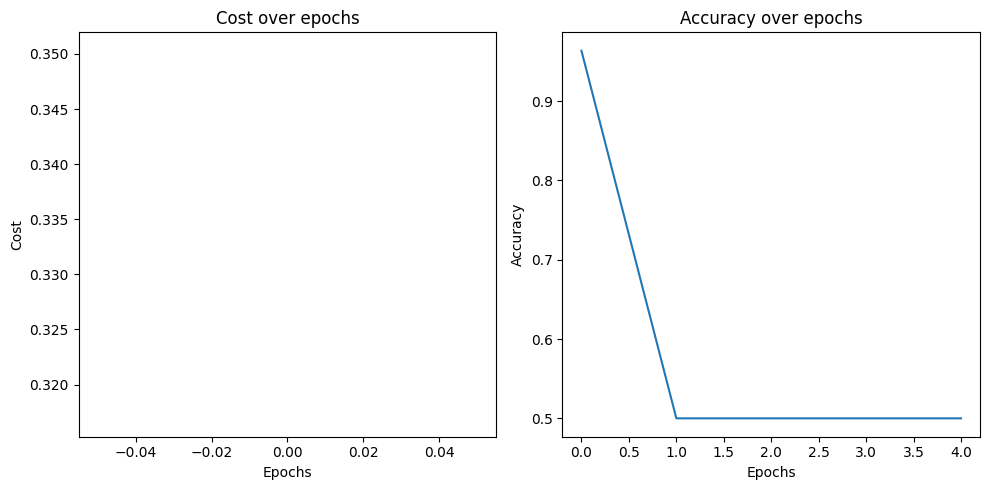

Testing model with sgd_momentum optimizer:
Cost after epoch 0: 0.7319971140089002, Accuracy: 0.5308333333333334
Cost after epoch 100: 0.11927148592915793, Accuracy: 0.9664166666666667
Cost after epoch 200: 0.07394152778307375, Accuracy: 0.9755
Cost after epoch 300: 0.058749896843488275, Accuracy: 0.9813333333333333
Cost after epoch 400: 0.051517805866803476, Accuracy: 0.9831666666666666
Accuracy of test data: 0.981


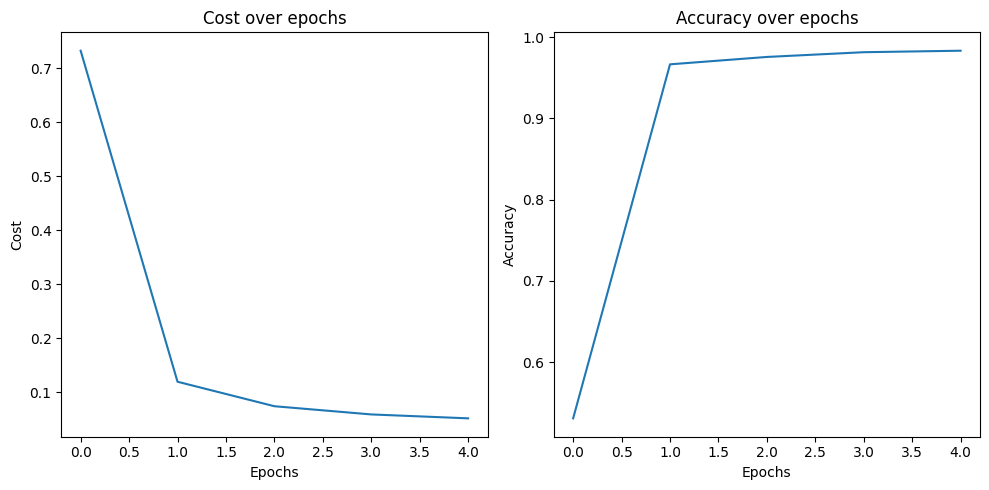

Testing model with sgd optimizer:
Cost after epoch 0: 0.36354595360529324, Accuracy: 0.96075
Cost after epoch 100: 0.0072236934235114965, Accuracy: 0.9984166666666666
Cost after epoch 200: 0.001623323411572544, Accuracy: 1.0
Cost after epoch 300: nan, Accuracy: 0.5
Cost after epoch 400: nan, Accuracy: 0.5
Accuracy of test data: 0.5


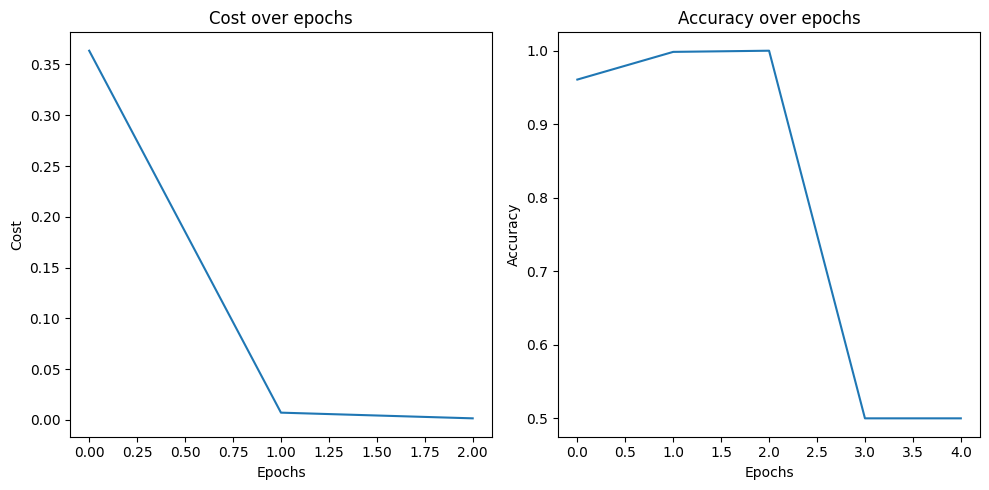

Testing model with rmsprop optimizer:
Cost after epoch 0: 0.2774984027922442, Accuracy: 0.968
Cost after epoch 100: nan, Accuracy: 0.5
Cost after epoch 200: nan, Accuracy: 0.5
Cost after epoch 300: nan, Accuracy: 0.5
Cost after epoch 400: nan, Accuracy: 0.5
Accuracy of test data: 0.5


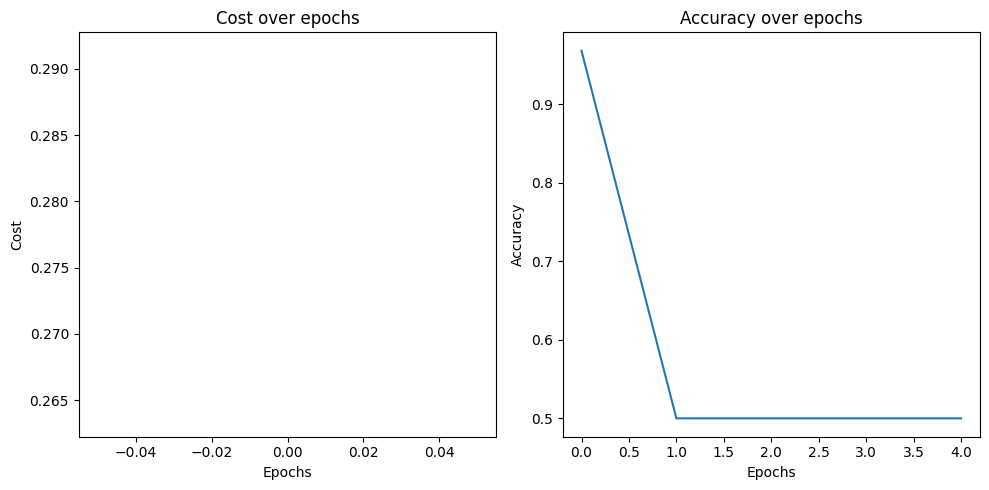

In [67]:
# Define the architecture of your neural network (number of units in each layer)
layers_dims = [x_train.shape[0], 50, 30, 20, 1]  # Example architecture

# Define hyperparameters and optimizer settings
initialization = "he"
learning_rate = 0.0001
mini_batch_size = 64
num_epochs = 400
print_cost = True
lambd = 0  # Regularization parameter
beta = 0.9
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8
activation = "relu"

optimizers = ["adam", "sgd_momentum", "sgd", "rmsprop"]

for optimizer in optimizers:
    print(f"Testing model with {optimizer} optimizer:")
    parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer, initialization, learning_rate,
                       mini_batch_size, beta, beta1, beta2, epsilon, num_epochs, print_cost, lambd, activation)


Testing model with adam optimizer:
Cost after epoch 0: 0.42523838048642293, Accuracy: 0.9600833333333333
Cost after epoch 100: 0.005320178280443033, Accuracy: 0.99975
Cost after epoch 200: 0.003634790031890067, Accuracy: 0.9999166666666667
Cost after epoch 300: 0.003460817270870683, Accuracy: 1.0
Cost after epoch 400: 0.003547878786659546, Accuracy: 0.9999166666666667
Accuracy of test data: 0.995


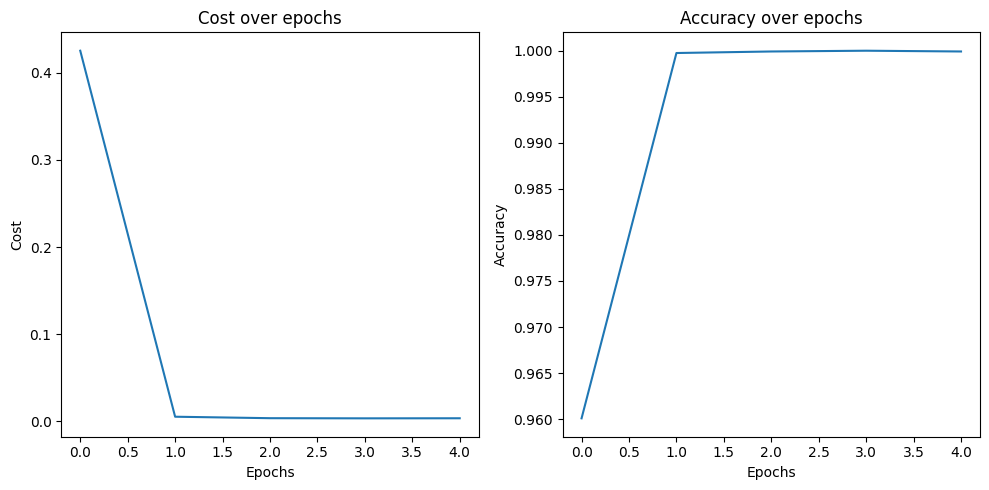

Testing model with sgd_momentum optimizer:
Cost after epoch 0: 0.7049332163612901, Accuracy: 0.5048333333333334
Cost after epoch 100: 0.2464305269068453, Accuracy: 0.9594166666666667
Cost after epoch 200: 0.10448043139831327, Accuracy: 0.9691666666666666
Cost after epoch 300: 0.07317913959034528, Accuracy: 0.9778333333333333
Cost after epoch 400: 0.06065506989546135, Accuracy: 0.9815
Accuracy of test data: 0.9805


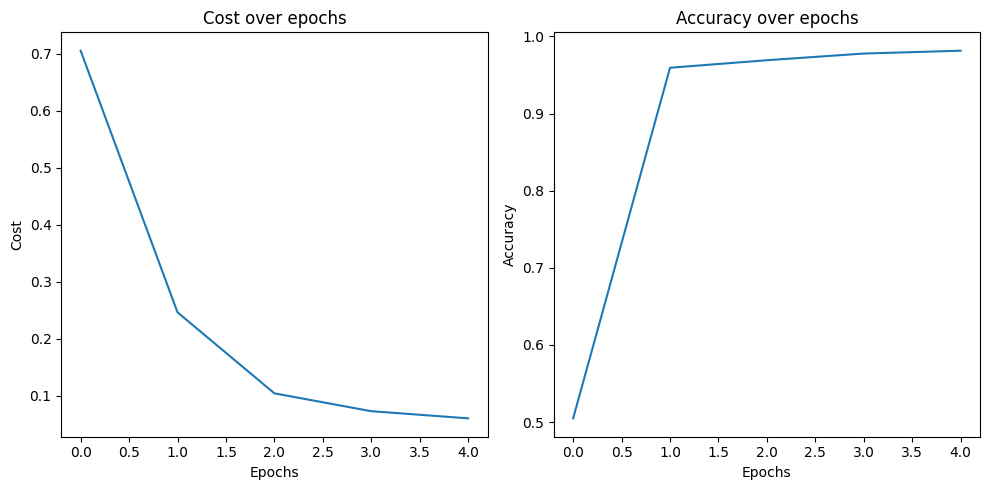

Testing model with sgd optimizer:
Cost after epoch 0: 5.167666093451775, Accuracy: 0.9460833333333334
Cost after epoch 100: 0.34500374942894724, Accuracy: 0.9788333333333333
Cost after epoch 200: 0.32995182268881307, Accuracy: 0.9793333333333333
Cost after epoch 300: 0.32504427245361917, Accuracy: 0.9786666666666667
Cost after epoch 400: 0.3229642671749775, Accuracy: 0.979
Accuracy of test data: 0.9735


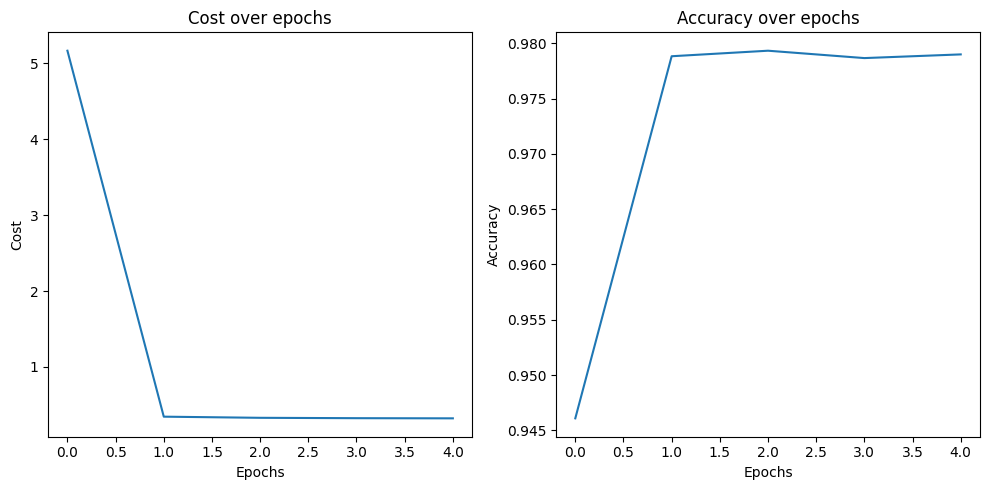

Testing model with rmsprop optimizer:
Cost after epoch 0: 0.3787216621260213, Accuracy: 0.9619166666666666
Cost after epoch 100: 0.008330745453064371, Accuracy: 0.99875
Cost after epoch 200: 0.005717253555530942, Accuracy: 0.9991666666666666
Cost after epoch 300: 0.005046616243225556, Accuracy: 0.9994166666666666
Cost after epoch 400: 0.004984754239999551, Accuracy: 0.9996666666666667
Accuracy of test data: 0.9925


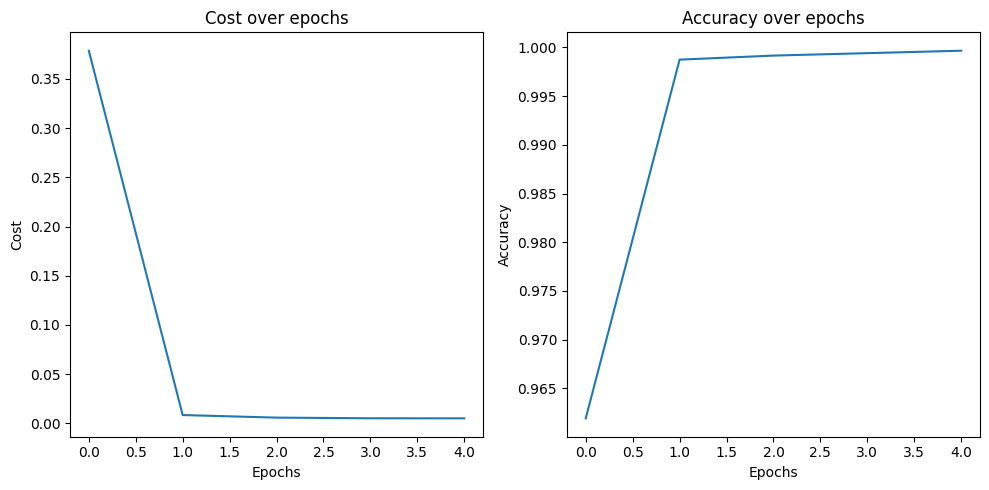

In [66]:
# Define the architecture of your neural network (number of units in each layer)
layers_dims = [x_train.shape[0], 50, 30, 20, 1]  # Example architecture

# Define hyperparameters and optimizer settings
initialization = "xavier"
learning_rate = 0.0001
mini_batch_size = 64
num_epochs = 400
print_cost = True
lambd = 0.1 # Regularization parameter
beta = 0.9
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8
activation = "relu"

optimizers = ["adam", "sgd_momentum", "sgd", "rmsprop"]

for optimizer in optimizers:
    print(f"Testing model with {optimizer} optimizer:")
    parameters = model(x_train, y_train, x_test, y_test, layers_dims, optimizer, initialization, learning_rate,
                       mini_batch_size, beta, beta1, beta2, epsilon, num_epochs, print_cost, lambd, activation)
